<h3> Use Real Phenotypes on 2706 training samples, July 16th </h3>
instead of using simulated phenotypes. 

In [2]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp
import subprocess
import io
from viprs.eval.metrics import r2 
from data.utils.Simulate_training import ELBO_plot
from data.utils.Simulate_training import *
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

<h5> For chr22, shuffled 500 SNPs  </h5>

In [101]:
np.random.seed(1234)
# real_phe for 2706 samples
real_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/shuffle_500snps",
    phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
    # backend="plink"
)
#"Toy_example_expr/phenotype/shuffle500_phe.csv"

real_gdl.perform_gwas()
real_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/real_shuffle_500snps.sumstats", sep="\t", index=False
)
real_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/shuffle500_chr22_out/')

realTrain_gdl, realVal_gdl = real_gdl.split_by_samples(proportions=[.8, .2])

> Reading BED file...
> Reading phenotype file...
> Performing GWAS...


Exception ignored in: <finalize object at 0x7f80bcf559a0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_bakzapwf'
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [75]:
real_gdl.sample_size


2706

In [102]:
print(realTrain_gdl.sample_size)
print(realVal_gdl.sample_size)

2146
560


In [77]:
v = vp.VIPRS(realTrain_gdl, fix_params={'pi': 0.998, 'sigma_epsilon': 0.750}) 
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 0/1000 [00:00<?, ?it/s]

 23%|██▎       | 227/1000 [00:00<00:02, 384.71it/s]

Converged at iteration 228 | ELBO: -2809.396998
> Final ELBO: -2809.396998
> Estimated heritability: 0.226304
> Estimated proportion of causal variants: 0.998000


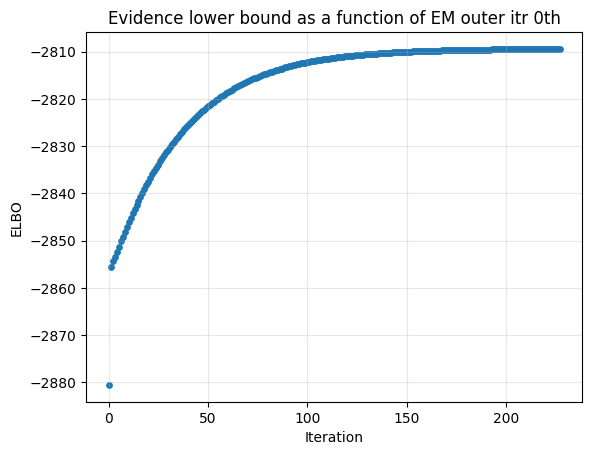

In [78]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_500SNPs_chr22.png",itr=0)

In [79]:
pred = v.predict(realVal_gdl)

> Generating polygenic scores...


In [80]:
r2(pred, realVal_gdl.sample_table.phenotype)

0.1025666943358552

In [81]:
# Pearson Correlation 
corr_train, p_value_train = pearsonr(pred, realVal_gdl.sample_table.phenotype)
corr_train

0.3202603539869636

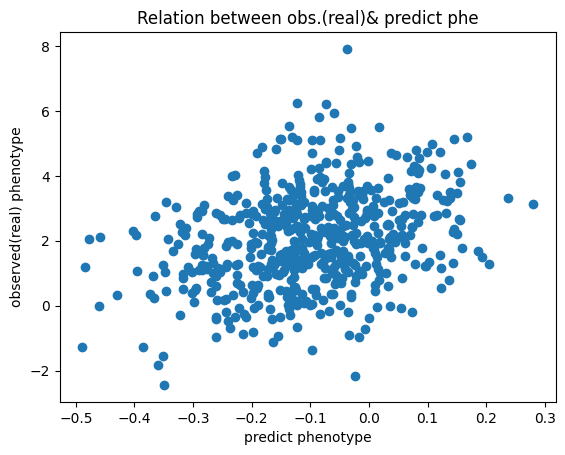

In [82]:
plot_obs_vs_pred(realVal_gdl.sample_table.phenotype, pred)

In [83]:
v.sigma_beta

0.0005337698077679693

In [84]:
pred.shape
realTrain_gdl.to_phenotype_table()

,FID,IID,phenotype
0,0,1000,1.800000
1,0,2000,2.130000
2,0,3000,2.010000
3,0,4000,2.540000
4,0,5000,-0.150000
...,...,...,...
2141,0,3061000,2.370120
2142,0,3062000,3.914104
2143,0,3064000,4.955841
2144,0,3065000,1.029280


In [85]:
v.get_heritability()

0.22630399041502844

In [86]:
v.get_average_effect_size_variance()

0.0005327022681524333

In [87]:
a = v.history['ELBO']
a

[-2880.5715103601588,
 -2855.5483103882934,
 -2854.276986187444,
 -2853.38648534939,
 -2852.3390477958883,
 -2851.258407054352,
 -2850.1875842575623,
 -2849.1371571451755,
 -2848.1094157064113,
 -2847.104670453533,
 -2846.1227478784526,
 -2845.1633474261384,
 -2844.226130936885,
 -2843.310746742176,
 -2842.4168368744604,
 -2841.5440396435906,
 -2840.6919908610503,
 -2839.8603246369667,
 -2839.048674021815,
 -2838.256671575712,
 -2837.483949891669,
 -2836.730142081846,
 -2835.9948822305105,
 -2835.277805815697,
 -2834.578550101039,
 -2833.8967544990637,
 -2833.232060907181,
 -2832.5841140175785,
 -2831.9525616021906,
 -2831.3370547739114,
 -2830.737248225204,
 -2830.1528004451848,
 -2829.5833739163113,
 -2829.0286352917005,
 -2828.4882555541253,
 -2827.9619101576704,
 -2827.449279153027,
 -2826.950047297346,
 -2826.4639041495493,
 -2825.990544151969,
 -2825.5296666991417,
 -2825.0809761945457,
 -2824.644182096064,
 -2824.218998950889,
 -2823.805146420565,
 -2823.4023492968577,
 -2823.01

<h5> Selected 506 SNPs for chr22 with the smallest pysical location </h5>
Selected the 1000 snps from the imputed dosage chr22 due to pysical location, extract <code> 506 snps </code> from real training data 

In [103]:
np.random.seed(1234)
# real_phe for 2706 samples
real_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/Selected_1000snps",
    phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
    # covariates_file="data/Dosage_for_PCA/chr22_covariates.csv",
    # backend="plink"
)
#"Toy_example_expr/phenotype/shuffle500_phe.csv"

real_gdl.perform_gwas()
real_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/real_Selected_1000snps.sumstats", sep="\t", index=False
)
real_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/Select1000snps_chr22_out/')

realTrain_gdl, realVal_gdl = real_gdl.split_by_samples(proportions=[.8, .2])

> Reading BED file...
> Reading phenotype file...
> Performing GWAS...
> Computing LD matrix...


Exception ignored in: <finalize object at 0x7f809f5249f0; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_xkelxdb6'


In [104]:
print(realTrain_gdl.sample_size)
print(realVal_gdl.sample_size)

2146
560


In [91]:
v = vp.VIPRS(realTrain_gdl, fix_params={'pi': 0.998024, 'sigma_epsilon': 0.75}) 
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 0/1000 [00:00<?, ?it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 3: ELBO dropped from -2870.904627 to -2883.584276.
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 4: ELBO dropped from -2883.584276 to -2895.101733.
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 5: ELBO dropped from -2895.101733 to -2905.531223.
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 6: ELBO dropped from -2905.531223 to -2915.044418.
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Iteration 7: ELBO dropped from -2915.044418 to -2923.707859.
  
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning

> Final ELBO: -2961.881819
> Estimated heritability: 0.123376
> Estimated proportion of causal variants: 0.998024


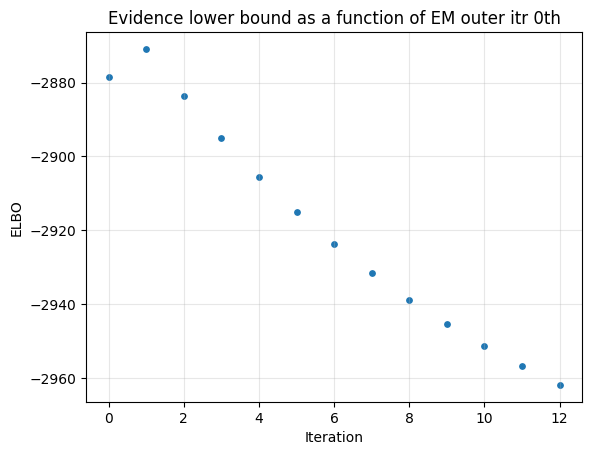

In [92]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_selected506snps_chr22.png",itr=0)

# Since the elbo is postive, and some of are not coverge, going downhill,
# no need to predict. 

<h5> For chr22, all (around 1.8w, 18292) SNPs </h5> 
for all 2706 patients, 
I want to find the suitable fixed_paramters in viprs. 

In [105]:
np.random.seed(1234)
# real_phe for 2706 samples
realA22_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/ALL_CM_chr22",
    phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
)
#"Toy_example_expr/phenotype/shuffle500_phe.csv"

realA22_gdl.perform_gwas()
realA22_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/real_chr22.sumstats", sep="\t", index=False
)
realA22_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/all_chr22_out/')

realA22Train_gdl, realA22Val_gdl = realA22_gdl.split_by_samples(proportions=[.8, .2])

> Reading BED file...
> Reading phenotype file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [106]:
print(realA22Train_gdl.sample_size)
print(realA22Val_gdl.sample_size)

2146
560


In [107]:
v = vp.VIPRS(realA22Train_gdl, fix_params={'pi': 0.999945, 'sigma_epsilon': 0.500000}) 
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 11%|█▏        | 114/1000 [01:04<08:24,  1.76it/s]

Converged at iteration 115 | ELBO: -1280.427334
> Final ELBO: -1280.427334
> Estimated heritability: 0.595551
> Estimated proportion of causal variants: 0.999945


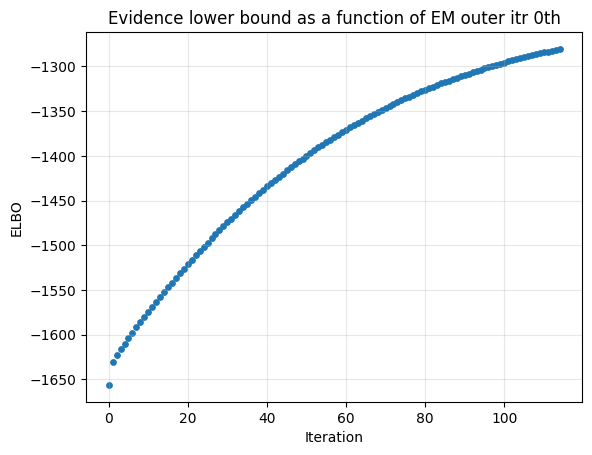

In [108]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_ALL_chr22.png",itr=0)

In [109]:
pred = v.predict(realA22Val_gdl)


> Generating polygenic scores...


In [110]:
print(r2(pred, realA22Val_gdl.sample_table.phenotype))
# realA22Train_gdl, realA22Val_gdl

# Pearson Correlation 
corr_train, p_value_train = pearsonr(pred, realA22Val_gdl.sample_table.phenotype)
corr_train


0.4461168893488521


0.6679198225452306

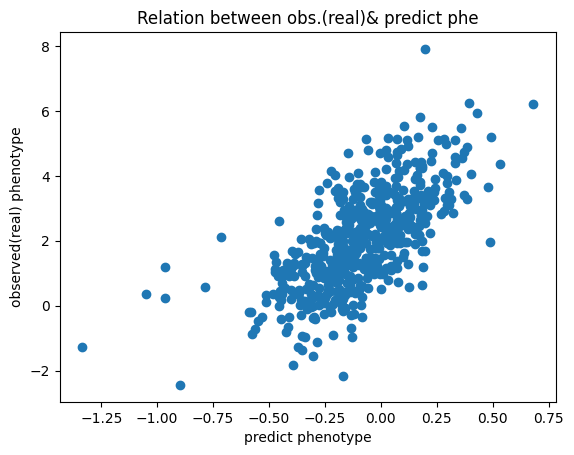

In [111]:
plot_obs_vs_pred(realA22Val_gdl.sample_table.phenotype, pred)

<h5> For chr22 add covariates variables, all (around 1.8w, 18292) SNPs </h5> 
<code>Covariates</code>: baselineDAS, sex, age, 10PCs from the chr22 dosage file. (specific to all snps in chr22)
for all 2706 patients, 
I want to find the suitable fixed_paramters in viprs. 

In [112]:
np.random.seed(1234)
realCo22_gdl = mgp.GWADataLoader(bed_files="CMAll_qced/chr22/ALL_CM_chr22",
                            phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
                            covariates_file="data/Dosage_for_PCA/chr22_covariates.csv",
                            )
realCo22_gdl.perform_gwas()
realCo22_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/real_addCov_22.sumstats", sep="\t", index=False
)
realCo22_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/all_Cov_chr22_out/') 
RCo_A22Train_gdl, RCo_A22Val_gdl = realCo22_gdl.split_by_samples(proportions=[.8, .2])

> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [113]:
print(RCo_A22Train_gdl.sample_size)
print(RCo_A22Val_gdl.sample_size)

2146
560


In [114]:
v = vp.VIPRS(RCo_A22Train_gdl, fix_params={'pi': 0.999945, 'sigma_epsilon': 0.500000}) 
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 11%|█▏        | 114/1000 [01:05<08:32,  1.73it/s]

Converged at iteration 115 | ELBO: -1280.427334
> Final ELBO: -1280.427334
> Estimated heritability: 0.595551
> Estimated proportion of causal variants: 0.999945


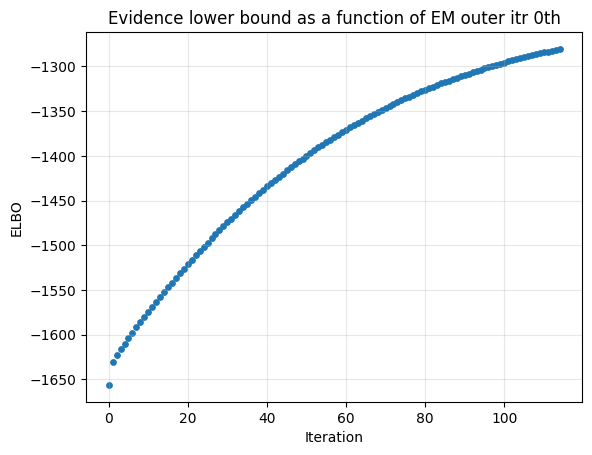

In [115]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_addCov_All22.png",itr=0)

In [116]:
pred = v.predict(RCo_A22Val_gdl)

print(r2(pred, RCo_A22Val_gdl.sample_table.phenotype))
# realA22Train_gdl, realA22Val_gdl

# Pearson Correlation 
corr_train, p_value_train = pearsonr(pred, RCo_A22Val_gdl.sample_table.phenotype)
corr_train

> Generating polygenic scores...
0.4461168893488521


0.6679198225452306

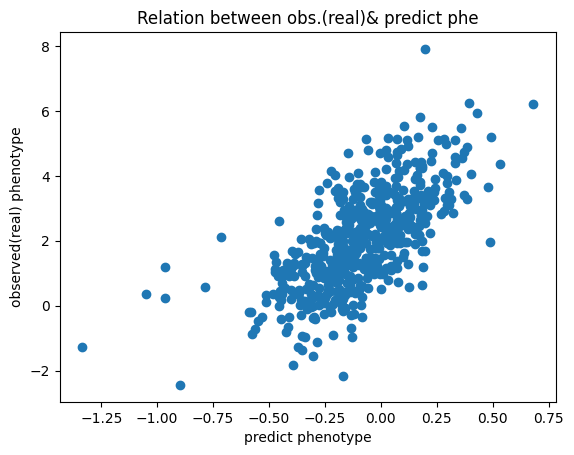

In [117]:
plot_obs_vs_pred(RCo_A22Val_gdl.sample_table.phenotype, pred)

<h5> Use Grid to find the suitable sigma epsilon and pi </h5>

Simulated phenotpyes

In [149]:
beta500np = np.zeros(500)
beta500np[0:2] = 0.2     # rs11090428
beta500np[2:6] = 0.1/3
beta500 = {22: beta500np}
g_sim = mgp.GWASimulator("CMAll_qced/chr22/shuffle_500snps",
                        pi = [.99, .01],
                        h2=0.5)
g_sim.set_beta(beta500)
g_sim.simulate(reset_beta=False)
# g_sim.simulate()
g_sim.to_phenotype_table().to_csv("Toy_example_expr/phenotype/shuffle500_phe.csv",sep='\t')

> Reading BED file...
> Generating polygenic scores...


In [150]:
# simulation on 2706
sim500_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/shuffle_500snps",
    phenotype_file="Toy_example_expr/phenotype/shuffle500_phe.csv",
)

sim500_gdl.perform_gwas()
sim500_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/shuffle_500snps.sumstats", sep="\t", index=False
)
sim500_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/shuffle500_chr22_out/')


> Reading BED file...
> Reading phenotype file...
> Performing GWAS...


Exception ignored in: <finalize object at 0x7f34710b0e10; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_huxhrh3y'
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Create grid  
The result will depends on the <code> training_data gdl and val_data gdl </code> I put into here. Then return me the most suitable <code> fixed_paramters: sigma_epsilon and pi</code> for this training dataset. 

In [46]:
# Create a grid:
grid = vp.HyperparameterGrid()
# Generate a grid for pi using 5 equidistant grid points:
# the inputs can be : realTrain_gdl, realA22Train_gdl
grid.generate_pi_grid(steps=8, n_snps=realTrain_gdl.n_snps)
# Generate a grid for sigma epsilon using 5 equidistant grid points:
grid.generate_sigma_epsilon_grid(steps=8)

vgv_gs = vp.VIPRSGridSearch(realTrain_gdl, grid)
vgv_gs = vgv_gs.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 0/1000 [00:00<?, ?it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Stopping at iteration 2 for model 0: The optimization algorithm is not converging!
Previous ELBO: 3436415104.685012 | Current ELBO: 7167638441.991796
  # Remove the CWD from sys.path while we load stuff.
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Stopping at iteration 2 for model 1: The optimization algorithm is not converging!
Previous ELBO: 3436415133.577688 | Current ELBO: 7167638630.388439
  # Remove the CWD from sys.path while we load stuff.
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Stopping at iteration 2 for model 2: The optimization algorithm is not converging!
Previous ELBO: 3436414864.666941 | Current ELBO: 7167638505.925400
  # Remove the CWD from sys.path while we load stuff.
/home/mcb/users/yzhu439/

Model 61 converged at iteration 2 || ELBO: -3056.392998
Model 62 converged at iteration 2 || ELBO: -3056.392998
Model 63 converged at iteration 2 || ELBO: -3056.392998


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Stopping at iteration 5 for model 35: The optimization algorithm is not converging!
Previous ELBO: -620.911737 | Current ELBO: 645.770350
  # Remove the CWD from sys.path while we load stuff.
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Iteration 5 | Model 46: ELBO dropped from -2833.675575 to -2836.493687.
  # Remove the CWD from sys.path while we load stuff.
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Iteration 5 | Model 47: ELBO dropped from -2870.834275 to -2882.821309.
  # Remove the CWD from sys.path while we load stuff.
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Iteration 5 | Model 48: ELBO dropped from -3009.870670 to -3021.721402.
  # Remove the CWD from sys.path while we load stuff

Model 50 converged at iteration 391 || ELBO: 20501.747431


 44%|████▎     | 437/1000 [00:05<00:06, 81.40it/s]

Model 49 converged at iteration 421 || ELBO: 14307.308586


 48%|████▊     | 483/1000 [00:06<00:06, 85.39it/s]

Model 40 converged at iteration 469 || ELBO: 18927.002896
Model 48 converged at iteration 474 || ELBO: 7980.602259


 58%|█████▊    | 583/1000 [00:07<00:04, 92.35it/s]

Model 51 converged at iteration 569 || ELBO: 29901.625961


100%|██████████| 1000/1000 [00:11<00:00, 84.77it/s]

> Optimization is complete for all 64 models.


In [47]:
vgv_gs.select_best_model(validation_gdl=realVal_gdl, criterion='validation')

> Generating polygenic scores...
> Based on the validation criterion, selected model: 23
> Model details:

sigma_epsilon       0.285715
pi                  0.998024
ELBO             1327.581278
Validation_R2       0.087387
Name: 23, dtype: float64


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


For real chr22 with all samples,
